In [85]:
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import os
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import statsmodels.api as sm

In [86]:
df_train = pd.read_csv("/Users/dohee/Documents/ds_study/ML_project1/datas/train_dataset.csv")

In [87]:
df_train.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.63090,1972.744388,117335.77160,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.69087,2010.051501,65671.87567,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.43760,2084.565132,75124.92172,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.28450,1960.039988,82913.63927,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.26765,1948.503884,60204.02027,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [88]:
X_train = df_train.drop(labels=['length','filename','label','tempo'],axis=1)
X_train

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.63090,1972.744388,117335.77160,3714.560359,1.080790e+06,...,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767
1,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.69087,2010.051501,65671.87567,3869.682242,6.722448e+05,...,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081
2,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.43760,2084.565132,75124.92172,3997.639160,7.907127e+05,...,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122
3,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.28450,1960.039988,82913.63927,3568.300218,9.216524e+05,...,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678
4,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.26765,1948.503884,60204.02027,3469.992864,6.102111e+05,...,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6985,0.366018,0.085601,0.038572,0.000350,2387.499899,505872.41890,2425.381489,105707.64130,5314.311711,1.498014e+06,...,1.376378,78.448189,-9.599662,22.257730,-2.213955,33.991325,-3.763993,43.443516,0.565705,18.512844
6986,0.325368,0.089568,0.051838,0.000534,3032.420576,918717.02480,2452.805187,75332.57439,5978.362568,1.522412e+06,...,6.433334,61.315834,-13.197737,34.461765,-1.891385,60.532436,-6.796290,98.297424,-3.002217,52.876480
6987,0.310797,0.088149,0.059556,0.000263,3417.255434,364268.09460,2568.698574,41202.98979,6522.986967,3.275768e+05,...,10.433615,60.689602,-17.422373,42.173134,0.854015,97.592766,-11.989034,48.981483,-6.660133,26.852741
6988,0.274922,0.085769,0.055231,0.000238,2763.375562,155237.56790,2435.322224,39964.79735,5955.752704,3.410146e+05,...,9.424459,42.007153,-14.634296,50.273201,1.016761,62.844273,-2.828952,47.716831,-0.797514,72.236191


In [89]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import sklearn

In [90]:
scaler = sklearn.preprocessing.StandardScaler()
np_scaled = scaler.fit_transform(X_train)

X_train= pd.DataFrame(np_scaled, columns=X_train.columns)

In [91]:
Y_train = df_train['label']

In [92]:
df_test = pd.read_csv("/Users/dohee/Documents/ds_study/ML_project1/datas/test_dataset.csv")

In [93]:
X_test = df_test.drop(labels=['length','filename','label','tempo'],axis=1)
X_test

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.327257,0.089326,0.102995,0.000962,2053.039265,175393.0681,2148.532118,68622.96847,4656.141076,9.236842e+05,...,3.939598,63.861172,-13.859185,44.053471,2.938299,51.255123,-9.926486,58.735661,-2.246609,38.642353
1,0.356214,0.091433,0.102495,0.001140,2289.782652,392561.3949,2218.779455,80153.74626,4907.582632,1.326447e+06,...,4.982336,85.640213,-10.624115,81.322975,3.053966,53.951809,-9.995337,35.738594,-5.606273,67.594528
2,0.314184,0.094665,0.113331,0.000868,2320.647543,481029.9734,2154.638135,90326.70166,4791.468975,1.535128e+06,...,0.239882,43.957005,-12.798533,108.835838,4.505296,55.439808,-11.319338,65.511330,-3.274713,49.242832
3,0.342166,0.094527,0.113219,0.001370,2310.365290,721766.3534,2119.048851,56215.37020,4781.944674,1.279051e+06,...,1.845170,100.082313,-12.982813,58.553513,3.541630,68.233871,-6.851357,85.219940,-0.377668,138.687073
4,0.300135,0.094798,0.113716,0.001045,2081.540213,227475.9871,2150.211727,46688.51282,4697.965182,7.632452e+05,...,3.941291,85.380920,-11.630838,35.749752,5.821163,74.074341,-10.610699,43.119072,-2.559036,76.863861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.8864,1718.707215,85931.57452,3015.559458,8.479527e+05,...,5.773784,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969
2996,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.9360,1906.468492,99727.03705,3746.694524,1.170890e+06,...,2.074155,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033
2997,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.2463,1561.859087,138762.84190,2442.362154,2.602871e+06,...,-1.005473,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990
2998,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.0392,2018.366254,22860.99256,4313.266226,4.968878e+05,...,4.123402,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750


In [94]:
scaler = sklearn.preprocessing.StandardScaler()
np_scaled = scaler.fit_transform(X_test)

X_test= pd.DataFrame(np_scaled, columns=X_test.columns)

In [95]:
Y_test = df_test['label']

In [96]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(Y_train)
y_test = le.fit_transform(Y_test)

In [97]:
model = LogisticRegression(multi_class='multinomial',solver='lbfgs')
model.fit(sm.add_constant(X_train), y_train)

/Users/dohee/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [98]:
# train

print(model.score(sm.add_constant(X_train), y_train))

0.7719599427753934


In [99]:
#test

print(model.score(sm.add_constant(X_test), y_test))

0.5333333333333333


In [14]:
model.intercept_

array([ 0.13909262, -3.45083974,  1.34211894,  1.38864061,  1.11062977,
       -0.43069984, -1.98470501, -0.8508618 ,  1.52975662,  1.20686783])

In [15]:
model.coef_

array([[ 1.16102437e-01, -5.01715273e-01,  4.97723758e-01,
         1.98403728e+00,  1.17022868e+00, -2.30897922e+00,
        -5.63555654e-01, -1.97939034e+00, -4.27858411e-01,
        -3.19717006e-01, -5.33094756e-01,  1.93133726e+00,
        -2.88276884e-01,  3.70235081e-01, -8.90787454e-01,
        -2.73581167e-01,  6.72574923e-01, -1.18941686e+00,
        -9.79706304e-02, -1.03506887e+00,  9.43108125e-02,
         1.74637506e+00,  2.78356251e-01,  6.54043961e-01,
         7.90056194e-02, -1.24501107e-01,  4.99477584e-01,
         1.08384147e+00, -4.80878529e-02, -8.31959862e-01,
         6.54307458e-02,  3.90846017e-01,  1.29939673e-01,
        -5.93499373e-01, -1.22495137e-01,  1.40865652e-02,
        -6.85045499e-02,  8.59044246e-02,  3.54021189e-02,
        -5.70169740e-01,  5.72724725e-02, -4.25431822e-01,
        -5.51277084e-02,  1.43727687e-01, -6.26664373e-02,
        -2.86010147e-01, -4.11749753e-02,  1.26020478e-01,
         1.62249924e-01, -3.77398302e-01, -1.57231584e-0

In [54]:
model.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [33]:
from matplotlib import pyplot
import statsmodels.api as sm

logit_model=sm.MNLogit(y_train,sm.add_constant(X_train))
logit_model
result=logit_model.fit()
stats1=result.summary()
stats2=result.summary2()
print(stats1)
print(stats2)

Optimization terminated successfully.
         Current function value: 0.660179
         Iterations 11
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                 6990
Model:                        MNLogit   Df Residuals:                     6477
Method:                           MLE   Df Model:                          504
Date:                Mon, 17 Apr 2023   Pseudo R-squ.:                  0.7133
Time:                        22:30:54   Log-Likelihood:                -4614.7
converged:                       True   LL-Null:                       -16095.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    y=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -9.0804      1.184     -7.669      0.000     -11.401  

In [100]:
y_pred = model.predict(sm.add_constant(X_test))

In [101]:
y_pred, y_test

(array([0, 8, 8, ..., 0, 6, 2]), array([0, 0, 0, ..., 9, 9, 9]))

In [102]:
tmp = y_test.tolist()

In [103]:
cmf = confusion_matrix(y_test, y_pred)
cmf

array([[ 94,   6,  51,  37,  21,  25,  19,   0,  21,  26],
       [  0, 290,   0,   0,   0,   8,   0,   2,   0,   0],
       [ 37,   1, 130,   8,  12,  11,   0,   0,  13,  88],
       [  9,   1,   8, 171,  13,   6,  16,   1,  19,  56],
       [ 16,   0,   2,  11, 104,   4,  36,  59,  60,   8],
       [  7,  11,  45,  12,   0, 153,   0,  35,  11,  26],
       [ 21,   0,   6,  21,  18,   9, 168,   0,   7,  50],
       [  0,   0,  11,   7,  15,   1,   0, 253,   3,  10],
       [  7,   1,  22,  10,  77,  21,   2,  52,  75,  33],
       [ 28,   2,  26,  29,   7,  14,  24,   0,   8, 162]])

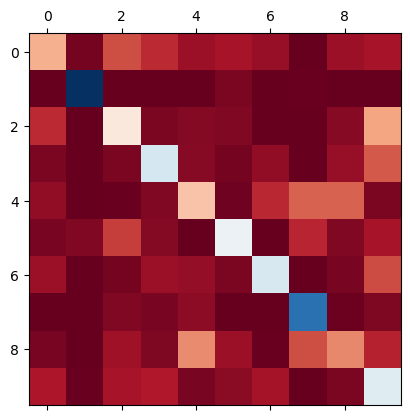

In [37]:
cmf = confusion_matrix(y_test, y_pred)
plt.matshow(cmf, cmap=plt.cm.RdBu)
plt.show()

<AxesSubplot: >

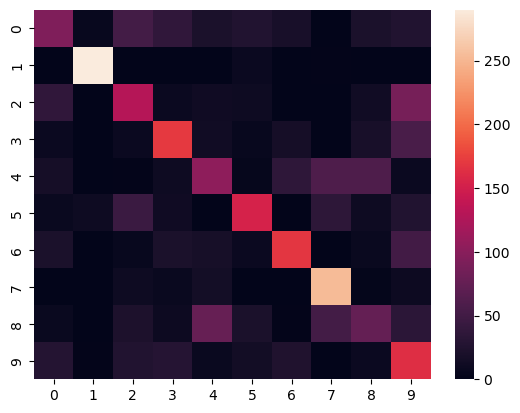

In [38]:
sns.heatmap(cmf)

---

In [105]:
df_metal = pd.read_csv("/Users/dohee/Documents/ds_study/data/new_music_csv/metal/Judas Priest_3s.csv")
new_x = df_metal.drop(labels=['path','split','filename'],axis=1)

In [106]:
new_x

,chroma_stft_mean,rms_mean,spectral_centroid_mean,spectral_bandwidth_mean,rolloff_mean,zero_crossing_rate_mean,chroma_stft_var,rms_var,spectral_centroid_var,spectral_bandwidth_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.426623,0.086533,1485.031879,1299.724686,2877.581318,0.090430,0.110524,0.003541,932833.489681,566623.825718,...,-1.013516,20.819517,-5.144908,22.305570,-3.074145,25.203482,-2.953585,18.889732,-0.310393,25.373926
1,0.490756,0.128138,1932.238654,1714.187743,3749.096304,0.119666,0.081521,0.001296,246334.673089,17267.086279,...,-3.534689,19.017800,-8.412212,17.574710,-5.385280,30.391441,-5.883793,25.875187,-1.499828,25.831366
2,0.442566,0.152381,2187.988001,1947.144259,4181.168307,0.124102,0.084743,0.002828,240779.521675,89355.531377,...,0.634119,40.323483,-1.888683,29.871552,-9.184343,41.083820,-8.367645,42.087710,1.706430,29.998774
3,0.461428,0.223805,2834.012068,2596.947113,5733.380972,0.132786,0.074493,0.001645,39455.635336,21859.136702,...,7.082585,31.774609,-0.752821,36.656765,-2.670883,17.034233,-6.305187,31.158570,4.081618,39.407390
4,0.569021,0.210228,2554.707990,2603.679705,5444.007850,0.098858,0.071718,0.001454,134237.956427,35302.016603,...,1.593215,22.308767,-4.954575,13.410201,0.253251,15.764389,-0.286384,23.120060,-0.666870,14.804504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.556768,0.212339,2516.872054,2498.146000,5211.697716,0.110254,0.065269,0.000997,59846.777687,36064.473654,...,5.038262,27.034222,-3.422349,19.982670,-1.266293,18.352753,-1.759772,28.428982,0.163983,18.138300
65,0.533989,0.213762,2580.842320,2512.518755,5315.305551,0.116305,0.062296,0.001230,106990.928685,41374.505716,...,5.728274,41.188130,-2.460672,14.625393,-1.972064,34.256780,-3.207199,33.623695,-0.032252,14.247714
66,0.557859,0.219457,2633.367688,2521.484413,5411.542405,0.115903,0.064187,0.002559,158885.040415,41745.696521,...,5.057076,25.545277,-2.348231,21.885240,-0.628264,27.037651,-0.550314,22.233438,0.172662,15.679906
67,0.407793,0.166954,1889.206741,1882.202679,3932.542631,0.078797,0.072275,0.000306,73483.409581,33922.867078,...,6.085705,28.458612,-4.182011,42.742474,-4.311391,25.827005,1.170660,28.402557,6.215093,43.897310


In [107]:
cols = X_test.columns.tolist()
cols

['chroma_stft_mean',
 'chroma_stft_var',
 'rms_mean',
 'rms_var',
 'spectral_centroid_mean',
 'spectral_centroid_var',
 'spectral_bandwidth_mean',
 'spectral_bandwidth_var',
 'rolloff_mean',
 'rolloff_var',
 'zero_crossing_rate_mean',
 'zero_crossing_rate_var',
 'harmony_mean',
 'harmony_var',
 'perceptr_mean',
 'perceptr_var',
 'mfcc1_mean',
 'mfcc1_var',
 'mfcc2_mean',
 'mfcc2_var',
 'mfcc3_mean',
 'mfcc3_var',
 'mfcc4_mean',
 'mfcc4_var',
 'mfcc5_mean',
 'mfcc5_var',
 'mfcc6_mean',
 'mfcc6_var',
 'mfcc7_mean',
 'mfcc7_var',
 'mfcc8_mean',
 'mfcc8_var',
 'mfcc9_mean',
 'mfcc9_var',
 'mfcc10_mean',
 'mfcc10_var',
 'mfcc11_mean',
 'mfcc11_var',
 'mfcc12_mean',
 'mfcc12_var',
 'mfcc13_mean',
 'mfcc13_var',
 'mfcc14_mean',
 'mfcc14_var',
 'mfcc15_mean',
 'mfcc15_var',
 'mfcc16_mean',
 'mfcc16_var',
 'mfcc17_mean',
 'mfcc17_var',
 'mfcc18_mean',
 'mfcc18_var',
 'mfcc19_mean',
 'mfcc19_var',
 'mfcc20_mean',
 'mfcc20_var']

In [108]:
new_x = new_x[cols]
new_x

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.426623,0.110524,0.086533,0.003541,1485.031879,932833.489681,1299.724686,566623.825718,2877.581318,3.076179e+06,...,-1.013516,20.819517,-5.144908,22.305570,-3.074145,25.203482,-2.953585,18.889732,-0.310393,25.373926
1,0.490756,0.081521,0.128138,0.001296,1932.238654,246334.673089,1714.187743,17267.086279,3749.096304,2.959858e+05,...,-3.534689,19.017800,-8.412212,17.574710,-5.385280,30.391441,-5.883793,25.875187,-1.499828,25.831366
2,0.442566,0.084743,0.152381,0.002828,2187.988001,240779.521675,1947.144259,89355.531377,4181.168307,6.430703e+05,...,0.634119,40.323483,-1.888683,29.871552,-9.184343,41.083820,-8.367645,42.087710,1.706430,29.998774
3,0.461428,0.074493,0.223805,0.001645,2834.012068,39455.635336,2596.947113,21859.136702,5733.380972,2.139294e+05,...,7.082585,31.774609,-0.752821,36.656765,-2.670883,17.034233,-6.305187,31.158570,4.081618,39.407390
4,0.569021,0.071718,0.210228,0.001454,2554.707990,134237.956427,2603.679705,35302.016603,5444.007850,4.653445e+05,...,1.593215,22.308767,-4.954575,13.410201,0.253251,15.764389,-0.286384,23.120060,-0.666870,14.804504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.556768,0.065269,0.212339,0.000997,2516.872054,59846.777687,2498.146000,36064.473654,5211.697716,2.798066e+05,...,5.038262,27.034222,-3.422349,19.982670,-1.266293,18.352753,-1.759772,28.428982,0.163983,18.138300
65,0.533989,0.062296,0.213762,0.001230,2580.842320,106990.928685,2512.518755,41374.505716,5315.305551,3.991223e+05,...,5.728274,41.188130,-2.460672,14.625393,-1.972064,34.256780,-3.207199,33.623695,-0.032252,14.247714
66,0.557859,0.064187,0.219457,0.002559,2633.367688,158885.040415,2521.484413,41745.696521,5411.542405,5.213752e+05,...,5.057076,25.545277,-2.348231,21.885240,-0.628264,27.037651,-0.550314,22.233438,0.172662,15.679906
67,0.407793,0.072275,0.166954,0.000306,1889.206741,73483.409581,1882.202679,33922.867078,3932.542631,1.193461e+05,...,6.085705,28.458612,-4.182011,42.742474,-4.311391,25.827005,1.170660,28.402557,6.215093,43.897310


In [109]:
new_x=scaler.transform(new_x)
new_y_pred = model.predict(sm.add_constant(new_x))

/Users/dohee/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [111]:
result_metal = le.inverse_transform(new_y_pred).tolist()

In [112]:
from collections import Counter
Counter(result_metal)

Counter({'rock': 26, 'metal': 11, 'hiphop': 26, 'pop': 5, 'disco': 1})

---

In [113]:
df_jazz = pd.read_csv("/Users/dohee/Documents/ds_study/data/new_music_csv/jazz/Norah Jones_3s.csv")
new_x = df_jazz.drop(labels=['path','split','filename'],axis=1)

In [114]:
new_x = new_x[cols]
new_x

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.267051,0.094691,0.037430,0.000310,1457.421800,3.814785e+05,1937.134698,198903.936285,3041.316481,2.657836e+06,...,13.839342,203.580220,13.029128,206.148510,2.753725,75.819240,-10.922633,175.117460,-7.394132,195.254300
1,0.283095,0.093183,0.064204,0.000799,1237.364317,3.315428e+05,1846.714498,265138.527785,2604.192458,3.038131e+06,...,-0.730807,60.519260,-0.100917,71.364950,6.314938,143.749420,6.368713,156.665660,4.519747,79.722640
2,0.275636,0.088164,0.055641,0.000599,1273.115598,4.987653e+05,1840.137628,301536.467337,2613.302659,3.849328e+06,...,-1.470196,29.403622,-6.299422,56.986317,-5.145606,56.738388,-6.176960,53.745674,2.239345,51.806858
3,0.285234,0.090487,0.098484,0.008189,1661.473763,6.782338e+05,1969.799924,156551.514774,3201.987305,2.313334e+06,...,-0.714127,168.054840,3.034890,152.905260,5.950865,185.885970,-0.210002,71.336030,2.460723,105.897140
4,0.254728,0.094483,0.090589,0.003655,1977.762491,1.682230e+06,2062.069525,243687.257467,3720.771860,4.715217e+06,...,-6.367304,54.039590,-6.577410,49.743397,3.231746,36.857265,4.369047,97.683470,12.329915,261.493130
5,0.232515,0.093913,0.110399,0.004245,1278.168277,2.447658e+05,1834.923507,204004.001689,2519.716046,2.339921e+06,...,-4.423537,68.056600,-3.541517,55.741367,2.594810,60.136433,-0.821041,155.000920,5.010178,70.594444
6,0.276734,0.088969,0.065629,0.000658,1386.170326,3.087494e+05,1932.884158,152700.300776,2934.147386,2.199008e+06,...,-2.305677,32.953526,-4.500158,53.934647,-8.911429,57.958700,-7.784819,48.475353,-2.859344,70.253470
7,0.285946,0.100021,0.127302,0.008609,1791.554523,3.611475e+05,2032.718586,166928.963200,3583.373460,1.765010e+06,...,-4.387052,66.165650,-2.096839,114.182724,-0.359231,119.601020,-3.517933,64.628280,5.563114,251.783660
8,0.282293,0.093733,0.078320,0.000902,1603.805998,7.510205e+05,2095.253741,318958.575183,3357.192007,4.500998e+06,...,-0.584473,28.745350,-0.685684,36.870940,4.888723,69.841440,5.499604,95.684930,5.687783,46.148857
9,0.221905,0.094553,0.106762,0.003322,1408.645463,1.816717e+05,1889.544564,138846.451653,2879.817458,1.528616e+06,...,-7.627875,87.231310,-3.479895,39.761257,-5.506801,55.753304,-7.517034,82.436560,2.778938,91.308235


In [116]:
new_x=scaler.transform(new_x)
new_y_pred = model.predict(sm.add_constant(new_x))

/Users/dohee/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [117]:
result_metal = le.inverse_transform(new_y_pred).tolist()

In [118]:
from collections import Counter
Counter(result_metal)

Counter({'jazz': 3,
         'country': 30,
         'pop': 23,
         'disco': 1,
         'hiphop': 2,
         'blues': 1})

---

In [119]:
df_classical1 = pd.read_csv("/Users/dohee/Documents/ds_study/data/new_music_csv/classical/Antonio Vivaldi_3s.csv")
new_x = df_classical1.drop(labels=['path','split','filename'],axis=1)

In [120]:
new_x = new_x[cols]
new_x=scaler.transform(new_x)

In [121]:
new_y_pred = model.predict(sm.add_constant(new_x))
result_metal = le.inverse_transform(new_y_pred).tolist()
Counter(result_metal)

/Users/dohee/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Counter({'reggae': 2,
         'classical': 182,
         'pop': 11,
         'jazz': 13,
         'country': 11,
         'hiphop': 4})

---

In [122]:
df_reggae = pd.read_csv("/Users/dohee/Documents/ds_study/data/new_music_csv/reggae/Rockinit_3s.csv")
new_x = df_reggae.drop(labels=['path','split','filename'],axis=1)

In [123]:
new_x = new_x[cols]
new_x=scaler.transform(new_x)

In [124]:
new_y_pred = model.predict(sm.add_constant(new_x))
result_metal = le.inverse_transform(new_y_pred).tolist()
Counter(result_metal)

/Users/dohee/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Counter({'hiphop': 17,
         'classical': 4,
         'disco': 4,
         'pop': 22,
         'country': 9,
         'reggae': 51,
         'rock': 3})

---

In [125]:
df_rock = pd.read_csv("/Users/dohee/Documents/ds_study/data/new_music_csv/rock/5 Seconds of Summer_3s.csv")
new_x = df_rock.drop(labels=['path','split','filename'],axis=1)

In [126]:
new_x = new_x[cols]
new_x=scaler.transform(new_x)

In [127]:
new_y_pred = model.predict(sm.add_constant(new_x))
result_metal = le.inverse_transform(new_y_pred).tolist()
Counter(result_metal)

/Users/dohee/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Counter({'jazz': 2,
         'rock': 10,
         'country': 4,
         'disco': 13,
         'pop': 33,
         'reggae': 1,
         'hiphop': 6,
         'classical': 3})

---

In [128]:
df_rock = pd.read_csv("/Users/dohee/Documents/ds_study/data/new_music_csv/metal/Enter Sandman_3s.csv")
new_x = df_rock.drop(labels=['path','split','filename'],axis=1)

In [129]:
new_x = new_x[cols]
new_x=scaler.transform(new_x)

In [130]:
new_y_pred = model.predict(sm.add_constant(new_x))
result_metal = le.inverse_transform(new_y_pred).tolist()
Counter(result_metal)

/Users/dohee/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Counter({'pop': 30,
         'country': 8,
         'disco': 18,
         'rock': 35,
         'metal': 4,
         'hiphop': 13,
         'reggae': 1,
         'classical': 1})

---